In [108]:
import numpy as np
import pandas as pd 
import scipy.linalg as la
import sympy as sy
from matplotlib import pyplot as plt
from datetime import datetime

In [19]:
def Prob1(A):
    '''
    Manually compute the value of the condition number
    '''
    vals = la.svdvals(A)
    s_max = vals[0]
    s_min = vals[-1]
    if (s_min == 0): return np.inf
    rv = s_max / s_min
    return rv

y = np.array([[9, 6], [12, 8]])
x = np.array([[2,2], [2,2]]) 
q, r = la.qr(x)
condy = Prob1(y)
condx = Prob1(x)
condq = Prob1(q)
print("Condition for Y: ", condy)
print("True Condition for Y: ", np.linalg.cond(y))
print("Condition for X: ", condx)
print("True Condition for X: ", np.linalg.cond(x))
print("I hope this is right", condq)
print("yeet")

Condition for Y:  inf
True Condition for Y:  inf
Condition for X:  5.961777047638983e+16
True Condition for X:  5.961777047638983e+16
I hope this is right 1.0000000000000002
yeet


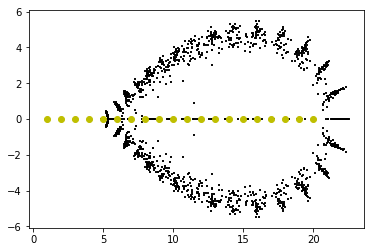

Average Relative Condition Number (100 iterations):  2284554243.91345
Average Absolute Condition Number (100 iterations):  22845542.4391345
Again, yeet


In [47]:
def Prob2():
    w_roots = np.arange(1, 21)
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    oldy = np.imag(w_roots)
    oldx = np.real(w_roots) 
    totabs = 0
    totrel = 0
    for i in range(100):
        c = np.random.normal(1, 1.E-10, 21) 
        new_coeffs = w_coeffs * c
        h = new_coeffs - w_coeffs
        new_roots = np.roots(np.poly1d(new_coeffs))
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        
        ## Plotting
        newy = np.imag(new_roots)
        newx = np.real(new_roots)
        plt.scatter(newx, newy, s=1, color='black', marker=',')

        
        
        ## absolute and relative condition numbers
        k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
        totabs += k
        rel = k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        totrel += rel
    plt.scatter(oldx, oldy, color = 'y') 
    plt.show()
    avrel = totrel / 100
    avabs = avrel / 100
    return avrel, avabs
        
rv = Prob2()
print("Average Relative Condition Number (100 iterations): ", rv[0])
print("Average Absolute Condition Number (100 iterations): ", rv[1])
print("Again, yeet")

In [53]:
def Prob3(A):
    '''
    compute relative and absolute condition number of 
    the eigenvalue problem of a given matrix A
    '''
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    AH = A + H
    A_eig = la.eigvals(A)
    AH_eig = la.eigvals(AH)
    Anorm = np.linalg.norm(A, ord=2)
    Hnorm = np.linalg.norm(H, ord=2)
    Eignorm = np.linalg.norm(A_eig, ord=2)
    difEignorm = np.linalg.norm(A_eig - AH_eig, ord=2)
    abscond = difEignorm / Hnorm
    relcond = (Anorm / Eignorm) * abscond
    return abscond, relcond
    
A = np.random.randint(8, size=(4, 4))
rv = Prob3(A)
print(rv)

(14054387152.59621, 15313166458.623962)


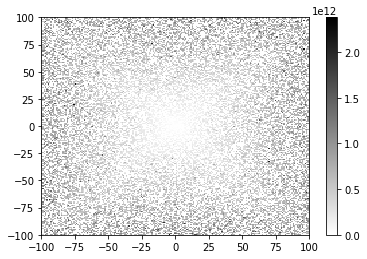

In [72]:
def Prob4(xmin, xmax, ymin, ymax, res):
    xrange = np.linspace(xmin, xmax, res)
    yrange = np.linspace(ymin, ymax, res)
    vals = np.zeros((res, res))
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            A = np.array([[1, x], [y, 1]])
            val = Prob3(A)[1]
            vals[j][i] = val
    
    
    X, Y = np.meshgrid(xrange, yrange)
    fig = plt.figure()
    plt.pcolormesh(X, Y, vals, cmap="gray_r")
    plt.colorbar()
    plt.show()
    
Prob4(-100, 100, -100, 100, 200)

(123.94655255124299, 4.475473693529592)

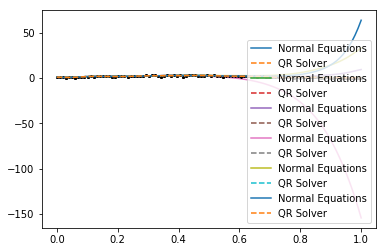

In [102]:
def Prob5(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    c1 =np.dot(np.dot(la.inv(np.dot(A.T,A)),A.T),yk)
    poly1 = np.polyval(c1, xk)
    forward_error_normal= la.norm(np.dot(A, c1) - yk)

    Q, R= la.qr(A,mode='economic')
    c2= la.solve_triangular(R, np.dot(Q.T,yk))
    
    poly2 = np.polyval(c2, xk)
    
    plt.plot(xk,yk, '*', markersize=2, c='black')
    plt.plot(xk,poly1, '-', label="Normal Equations")
    plt.plot(xk,poly2, '--', label="QR Solver")
    plt.legend()
    forward_error_QR= la.norm(np.dot(A,c2) - yk)
    
    return forward_error_normal, forward_error_QR

    
Prob5(8)
Prob5(10)
Prob5(12)
Prob5(14)
Prob5(16)
Prob5(18)


In [132]:
def Prob6():
    ns = np.arange(5, 50, 5)
    vals = np.zeros((ns.shape[0], 3))
    x = sy.symbols('x')
    for i, n in enumerate(ns):
        vals[i][0] = sy.integrate(x**n * sy.exp(x-1), (x, 0, 1))
        vals[i][1] = (-1)**n * sy.subfactorial(n) + (-1)**(n+1) * sy.factorial(n) / sy.exp(1)
        vals[i][2] = abs(vals[i][0] - vals[i][1]) / abs(vals[i][0])
    return vals

Prob6()


array([[0.14553294, 0.14553294, 0.        ],
       [0.08387707, 0.08387707, 0.        ],
       [0.05901754, 0.05901754, 0.        ],
       [0.04554488, 0.04554488, 0.        ],
       [0.03708621, 0.03708621, 0.        ],
       [0.03127967, 0.03127967, 0.        ],
       [0.02704629, 0.02704629, 0.        ],
       [0.02382273, 0.02382273, 0.        ],
       [0.02128604, 0.02128604, 0.        ]])